# Optional Exercise 6 - Finite Impulse Response (FIR) Filters (30 mins)

## Objectives
- To introduce Finite Impulse Response (FIR) filters

## Video ([Backup Link](https://www.youtube.com/watch?v=MuolOVfv1HQ))

In [7]:
# Embed Youtube video
from IPython.display import HTML 
HTML('''<script> code_show=true;function code_toggle() {if (code_show){$('.cm-comment:contains(@hidden)').closest('div.input').hide();} else {$('.cm-comment:contains(@hidden)').closest('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><center><iframe width="560" height="315" src="https://www.youtube.com/embed/MuolOVfv1HQ?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>''') # @hidden

## Lab Exercise

The filter impulse response is the output when the input is $\delta[n]$. Recall that an impulse signal contains equal power in all frequency components, i.e. its magnitude spectrum is a constant across all frequencies (flat). Therefore, the frequency response of a filter is simply the discrete Fourier transform of the filter's impulse response.

We have already seen one method of filtering in Exercise 4, e.g., setting all unwanted frequency components to zero. However, this is not the only nor most direct way to filter a signal. In this exercise, we are going to look at a different, and often better, approach using Finite Impulse Response (FIR) filters.

---
**Definition**:
    
$$\text{Finite Impulse Response (FIR) Filter: }y[n]=\sum^{M}_{k=0}b[k]x[n-k]$$

---

The $(M+1)$ coefficients of FIR filters are $b[n]$, where $n=0,\dots,M$. Consider an FIR filter whose coefficients consists of a sequence of 4 ones. 


**Question 6.1**: Describe the frequency response, $B(e^{j\Omega})$, of this filter, $b[n] = \{1,\: 1,\: 1,\: 1\}$, using `plot_spec` provided in the `lab_functions` file. What do you observe about the phase?



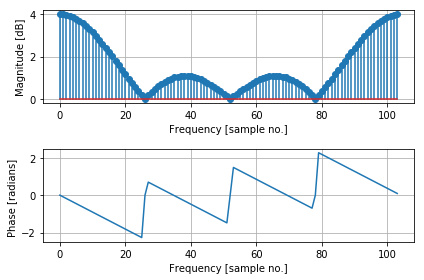

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from functions.lab_functions import plot_spec

b = np.concatenate((np.ones(4), np.zeros(100)))
B = fft(b)
plt = plot_spec(B, func='stem')
plt.show()

This filter keeps the low frequency components intact and reduces the high frequency components. It is, therefore, known as a low-pass filter.


**Question 6.2**: Suppose the input signal to the filter is $x[n]$, show that this filter produces the output $y[n] = x[n] + x[n-1]+ x[n-2] + x[n-3]$.

Now let us create a moving average filter and use it on some real-world data, namely the number of daily Coronavirus (COVID-19) cases in the UK between 2020-01-30 and 2020-06-29. Start by loading `coronavirus.mat` from the file:

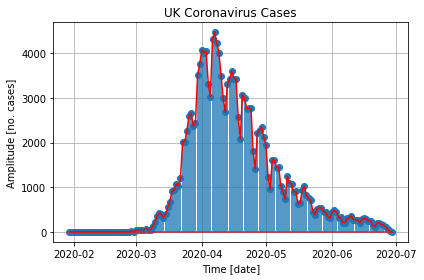

In [9]:
import datetime
import IPython.display as ipd

from functions.lab_functions import load
from functions.lab_functions import plot_signal

data = load('files/coronavirus.mat', 'data')

t = [datetime.date(2020, 1, 30) + datetime.timedelta(days=x) for x in range(len(data))]

plt = plot_signal(t, data, title='UK Coronavirus Cases', xlabel='Time [date]', ylabel='Amplitude [no. cases]', func='stem')

## Write code to implement moving average filter and compute filtered_data
filtered_data = data # modify this line for filtered data
plt.plot(t, filtered_data, color='red')
plt.show()

**Question 6.3** Implement a 4 day moving average filter (Hint: $b[n] = \frac{1}{4}\{1,\: 1,\: 1,\: 1\}$)  which can be done using the `np.convolve(x, b)` function to perform a convolution between the signal, $x[n]$, and $b[n]$.


**Question 6.4** Compare the waveform before and after filtering. Do you see what you would have expected? Now modify $b[n]$ to implement a 7 day moving average filter.

We can create impressive FIR filters using Python's filter designer functions.  Let us start by listening to the audio file `aircrew.wav`: 

<audio controls src="files/aircrew.wav"> 
</audio>

Now run the code below that calculates these FIR coefficients using Python’s filter designer functions. It then applies a band-stop filter to the audio file `aircrew.wav`. Listen to the audio output.

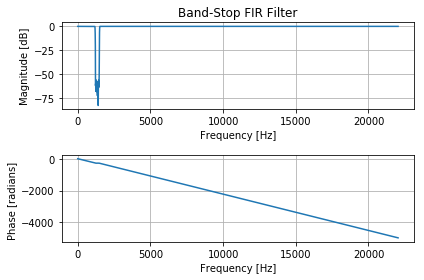

Filtered Audio Output (FIR Band-stop):


In [10]:
import soundfile as sf
from scipy import signal
from functions.lab_functions import plot_spec

x, fs = sf.read('files/aircrew.wav')       

# The Nyquist rate of the signal.
nyq_rate = fs/2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 50 Hz transition width.
width = 50.0/nyq_rate

# The desired attenuation in the stop band in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = signal.kaiserord(ripple_db, width)

# Desired stop band, Hz
band = [1200, 1500]  

# Use firwin with a Kaiser window to create a lowpass FIR filter.
b_fir_bsf_new = signal.firwin(N, [b/nyq_rate for b in band])

w, h = signal.freqz(b_fir_bsf_new, [1], worN=2000)

f_step = w*fs/(2*np.pi)
plt = plot_spec(f_step, h, title='Band-Stop FIR Filter', dB=True)
plt.show()

y_bs = np.convolve(x, b_fir_bsf_new);

sf.write('results/ex6/aircrew_fir_bsf.wav', y_bs, fs) 
print('Filtered Audio Output (FIR Band-stop):')
ipd.Audio('results/ex6/aircrew_fir_bsf.wav')

You have probably notice that this recording also contains a lot of background noise at high frequencies. Let us now design a low-pass filter using `firwin` to create the coefficients, `b_fir_lpf`, for the low-pass filter. Listen to this output and compare with the previous version.

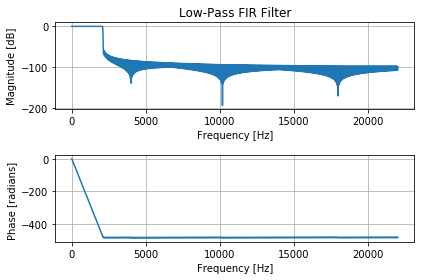

Filtered Audio Output (FIR Band-stop + Low-pass):


In [11]:
# Desired stop band, Hz
band = [2100]  

# Use firwin with a Kaiser window to create a lowpass FIR filter.
b_fir_lpf = signal.firwin(N, [b/nyq_rate for b in band])

w, h = signal.freqz(b_fir_lpf, [1], worN=2000)

f_step = w*fs/(2*np.pi)
plt = plot_spec(f_step, h, title='Low-Pass FIR Filter', dB=True)
plt.show()

y_lp = np.convolve(y_bs, b_fir_lpf);

sf.write('results/ex6/aircrew_fir_bsf_lpf.wav', y_lp, fs) 
print('Filtered Audio Output (FIR Band-stop + Low-pass):')
ipd.Audio('results/ex6/aircrew_fir_bsf_lpf.wav')

Let us compare this result with the filtering approach used in Exercise 4. To save time, the complete code has been provided below:

In [12]:
from scipy.fft import fft
from scipy.fft import ifft

x, fs = sf.read('files/aircrew.wav') 
Tsamp = 1/fs
Nsamp = len(x)
t = np.arange(0, Nsamp*Tsamp, Tsamp)

X = fft(x); 

cutoff = 2200;
band_start = 1200;
band_end = 1500;
n = round(cutoff/fs*Nsamp); # calculate the frequency index
n_start = round(band_start/fs*Nsamp); 
n_end = round(band_end/fs*Nsamp); 

X[n:-n] = 0; # low-pass
X[n_start:n_end] = 0; # band-stop (1)
X[-n_end:-n_start] = 0; # band-stop (2)

y = np.real(ifft(X));

sf.write('results/ex6/aircrew_freq_bsf_lpf.wav', y, fs) 
print('Filtered Audio Output (Using Filtering Approach From Ex. 4 - Band-stop + Low-pass):')
ipd.Audio('results/ex6/aircrew_freq_bsf_lpf.wav')

Filtered Audio Output (Using Filtering Approach From Ex. 4 - Band-stop + Low-pass):


**Question 6.5**: The performance using the approach from Exercise 4 is worse. Can you explain why? Can you also hear the difference between `aircrew_fir_bsf_lpf.wav` and `aircrew_freq_bsf_lpf.wav`? Hint: The low-pass filter we have just created using the direct method from Exercise 4 has the following frequency response given below:

<img src="img/ex7_1.png"/> 

